# Percepton
## $$
\begin{equation*}
z = \left\{ 
    \begin{array}{ll}
        1  \quad &\text{if} \; w_1x_1 + w_2x_2 + \dots + w_nx_n  \; \geq \; \theta \\
        0  \quad &\text{if} \; w_1x_1 + w_2x_2 + \dots + w_nx_n  \; \lt \; \theta
    \end{array}
    \right. \\
\end{equation*}
$$
### $
\text{where $\theta$ is threshold} \\
\text{ 0 mean not pass through percepton}\\ 
\text{1 pass}
$

![NN](https://phyblas.hinaboshi.com/rup/nayuki/umaki/a01.png)

### แต่โดยทั่วไปแล้วจะไม่เขียนในรูป threshold แต่จะให้ผั่งขวาเป็น 0
## $$
w_1x_1 + w_2x_2 + \dots + w_nx_n = \theta \\
w_1x_1 + w_2x_2 + \dots + w_nx_n - \theta = 0 \\
w_1x_1 + w_2x_2 + \dots + w_nx_n + b = 0 \\
\\
\text{given} \quad a = w_1x_1 + w_2x_2 + \dots + w_nx_n + b = \sum_{i=1}^n w_ix_i \\
\text{b = $-\theta$}
$$


## $$
\begin{equation*}
z = \left\{ 
    \begin{array}{ll}
        1  \quad &\text{if} \: a \geq 0 \\
        0  \quad &\text{if} \: a \lt 0
    \end{array}
    \right. \\
\end{equation*}
$$

![NN a](https://phyblas.hinaboshi.com/rup/nayuki/umaki/a02.png)

## So $w_i \& b $ is **parameters** of this percepton
### Role of machine is to find **optimized parameters** for us

# Example 1 : อยากจะซื้อคีย์บอร์ดราคา 1000 มากๆ 
### แบงค์ในกระเป๋ามีเพียงแบงค์ ๒๐ กับ แบงค์ ๕๐ เท่านั้น 
### ถามว่าจะต้องใช้ แบงค์อย่างละเท่าไหร่
## $$
\text{given $x_1$ is number of bill 20} \\
\text{$x_2$ is number bill 50} \\
\text{b = -1000} \\
\color{red}{a = 20x_1 + 50x_2 - 1000}
$$

![NN buy keyboard](https://phyblas.hinaboshi.com/rup/nayuki/umaki/a03.png)

In [66]:
import numpy as np

def h(money_amount):
    w = np.array([20,50])
    b = -1000
    a = (w*money_amount).sum() + b
    return int(a>=0) # convert T,F to be 1,0

amount = np.array([10,20]) # array of number of each bill
print(h(amount)) # x_1 = 10, x_2 = 20 is pass through percepton

1


In [67]:
amount2 = np.array([10,0]) # แบ๊งค์ 20 10ใบ มีเงิน = 200 ไม่พอซื้อของ 1000
print(h(amount2))

0


## Write in Matrix form
# $$
\vec{a} = x \cdot \vec{w} + b
$$
$\text{where a, w is vector} \\
\text{b is just normal number} \\
\text{x is matrix that compatible with $\vec{w}$ (dim: (NxM)$\cdot$ (Mx1))}
$

## $
\begin{align}
    \vec{w} = \begin{bmatrix}
        w_0 \\
        w_1 \\
        \vdots \\
        w_{m-1}
    \end{bmatrix}
\end{align}
$

## $
\begin{align}
    \vec{a} = \begin{bmatrix}
        a_0 \\
        a_1 \\
        \vdots \\
        a_{n-1}
    \end{bmatrix}
        = \begin{bmatrix}
        \sum_{j=0}^{m-1} w_j x_{0,j} + b \\
        \sum_{j=0}^{m-1} w_j x_{1,j} + b \\
        \vdots \\
        \sum_{j=0}^{m-1} w_j x_{n-1,j} + b \\
    \end{bmatrix} \\ \\
    a_i = \sum_{j=0}^{m-1} w_j x_{i,j} + b
\end{align} 
$

In [68]:
def h(X):
    w = np.array([20,50])
    b = -1000
    a = np.dot(X,w) + b
    return (a>=0).astype(int)

X = np.array([[10,0],
             [10,18],
             [10,222]])
print(h(X))

[0 1 1]


# VISUALIZE SECTION WHICH PAIR CAN BUY สิ่งของ 
### (basic binary classification) 

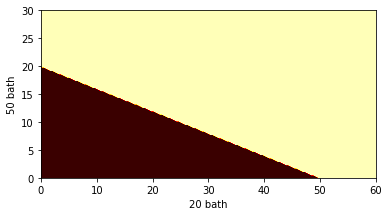

In [69]:
import matplotlib.pyplot as plt
import numpy as np
mx,my = np.meshgrid(np.linspace(0,60,200), np.linspace(0,30,200))
mX = np.array([mx.ravel(), my.ravel()]).T
mz = h(mX).reshape(200,-1)

plt.axes(aspect=1)
plt.contourf(mx,my,mz,cmap='hot')
plt.xlabel(u'20 bath')
plt.ylabel(u'50 bath')
plt.show()

In [70]:
np.array([mx.ravel(), my.ravel()]).shape, mx.shape, my.shape

((2, 40000), (200, 200), (200, 200))

In [71]:
h(mX).shape, h(mX).reshape(200,-1).shape

((40000,), (200, 200))

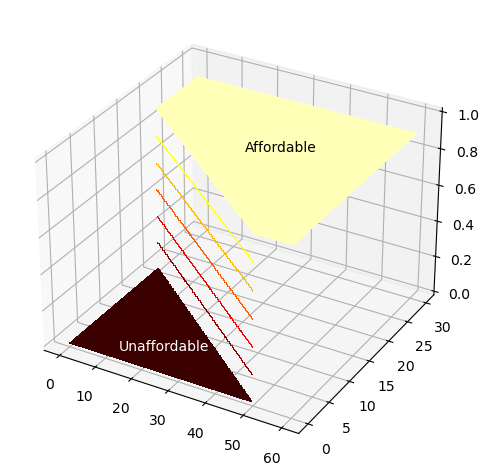

In [72]:
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(6,6), dpi=100, frameon=False)
ax = plt.axes(projection='3d')
# ax.plot_surface(mx,my,mz, )
# ax.scatter3D(mx,my,mz)
ax.contourf3D(mx,my,mz, cmap=plt.cm.hot)
# ax.annotate('Affordable', xy=(40,25), )
ax.text(40,15,1, 'Affordable', zorder=99, ha='center', va='center')
ax.text(20,5,0, 'Unaffordable', zorder=99, ha='center', va='center',
       c='white')
plt.show()

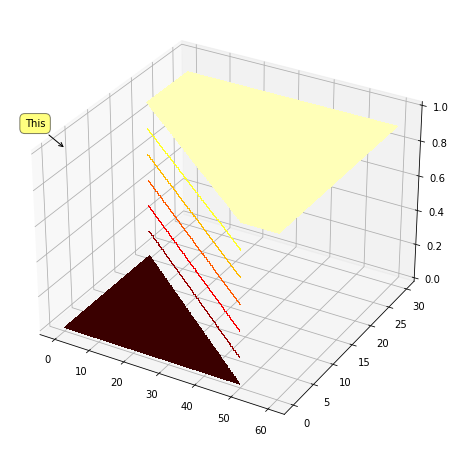

In [96]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import pylab
from mpl_toolkits.mplot3d import Axes3D, proj3d


fig = pylab.figure(figsize=(8,8),) 
ax = fig.add_subplot(111, projection='3d')
ax.contourf3D(mx,my,mz, cmap=plt.cm.hot)

x2, y2, _ = proj3d.proj_transform(1,1,1, ax.get_proj())

label = pylab.annotate(
    'This',
    xy = (x2,y2), xytext=(-20, 20),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round', pad=.5, fc='yellow', alpha=.5),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
)
def update_position(e):
    x2, y2, _ = proj3d.proj_transform(1,1,1, ax.get_proj())
    label.xy = x2,y2
    label.update_positions(fig.canvas.get_renderer())
    fig.canvas.draw()
fig.canvas.mpl_connect('motion_notify_event', update_position)

pylab.show()
## NOT WORK ?

# Example 2 : Logic Gates ประตูสัญญาณตรรกะ

In [132]:
def or_gate_h(X, w=np.array([1,1]), b=-0.9): # equal weight
    # print(w.shape) # dim : (2,)
    # a = np.dot(w,X) + b
    a = np.dot(X,w) + b # dim : 4x2 vs 2x1
    return (a>=0).astype(int)

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
print(or_gate_h(X))

[0 1 1 1]


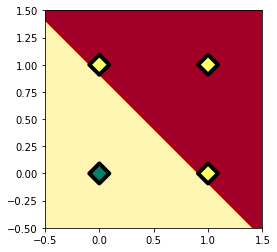

In [133]:
n = 100
mx, my = np.meshgrid(np.linspace(-0.5, 1.5, n), np.linspace(-0.5, 1.5, n))
mX = np.array([mx.ravel(), my.ravel()]).T
mz = or_gate_h(mX).reshape(n, -1)

plt.axes(aspect=1)
plt.contourf(mx,my,mz, cmap=plt.cm.YlOrRd)
plt.scatter(X[:, 0], X[:, 1], s=200, 
           c=or_gate_h(X), edgecolors='k', linewidths=4,
         marker='D', cmap='summer')
plt.show()

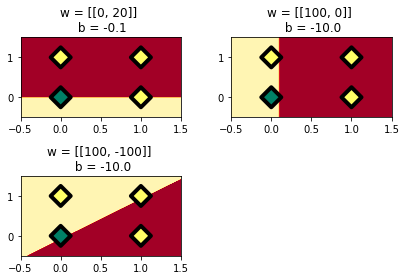

In [161]:
n = 100
mx, my = np.meshgrid(np.linspace(-0.5, 1.5, n), np.linspace(-0.5, 1.5, n))
mX = np.array([mx.ravel(), my.ravel()]).T

# Add percepton's parameters

plt.subplot(221, )
w=np.array([0,20]); b=-0.1
mz = or_gate_h(mX, w=w, b=b).reshape(n, -1)
plt.contourf(mx,my,mz, cmap=plt.cm.YlOrRd)
plt.scatter(X[:, 0], X[:, 1], s=200, 
           c=or_gate_h(X), edgecolors='k', linewidths=4,
         marker='D', cmap='summer')
plt.title('w = [%s] \n b = %.1f' % (list(w),b))

plt.subplot(222,)
w=np.array([100,0]); b=-10
mz = or_gate_h(mX, w=w, b=b).reshape(n, -1)
plt.contourf(mx,my,mz, cmap=plt.cm.YlOrRd)
plt.scatter(X[:, 0], X[:, 1], s=200, 
           c=or_gate_h(X), edgecolors='k', linewidths=4,
         marker='D', cmap='summer')
plt.title('w = [%s] \n b = %.1f' % (list(w),b))

plt.subplot(223,)
w=np.array([100,-100]); b=-10
mz = or_gate_h(mX, w=w, b=b).reshape(n, -1)
plt.contourf(mx,my,mz, cmap=plt.cm.YlOrRd)
plt.scatter(X[:, 0], X[:, 1], s=200, 
           c=or_gate_h(X), edgecolors='k', linewidths=4,
         marker='D', cmap='summer')
plt.title('w = [%s] \n b = %.1f' % (list(w),b))

plt.tight_layout()
plt.show()